<a href="https://colab.research.google.com/github/whitehatjr1001/F1dataanalysis/blob/main/F1dataanalysis_Bahrain2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastf1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.4/79.4 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 6.9 MB/s eta 0:00:00


In [2]:

from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1.core import Laps
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure 
import numpy as np
import pandas as pd

In [ ]:
ff1.Cache.enable_cache('/content/drive/MyDrive/Cache')

In [ ]:
#simple visualization of bahrain qualifying
year=2023
Circut='Bahrain'
session = ff1.get_session(year,Circut,'R')
session.load()
laps=session.load_laps(with_telemetry=True)

In [ ]:
Q=ff1.get_session(year,Circut,'Q')
Q.load()
laps_q=Q.load_laps(with_telemetry=True)

In [ ]:
drivers = pd.unique(session.laps['Team'])
print(drivers)

['Red Bull Racing' 'Aston Martin' 'Ferrari' 'Mercedes' 'Alfa Romeo'
 'Alpine' 'Williams' 'AlphaTauri' 'Haas F1 Team' 'McLaren']


In [ ]:
#creating a   list and storing thefastet times using loop
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap =   Q.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

In [ ]:
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

In [ ]:
print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])

   Driver                LapTime           LapTimeDelta
0     VER 0 days 00:01:29.708000        0 days 00:00:00
1     PER 0 days 00:01:29.846000 0 days 00:00:00.138000
2     LEC        0 days 00:01:30 0 days 00:00:00.292000
3     SAI 0 days 00:01:30.154000 0 days 00:00:00.446000
4     ALO 0 days 00:01:30.336000 0 days 00:00:00.628000
5     RUS 0 days 00:01:30.340000 0 days 00:00:00.632000
6     HAM 0 days 00:01:30.384000 0 days 00:00:00.676000
7     STR 0 days 00:01:30.836000 0 days 00:00:01.128000
8     OCO 0 days 00:01:30.984000 0 days 00:00:01.276000
9     HUL 0 days 00:01:31.055000 0 days 00:00:01.347000
10    NOR 0 days 00:01:31.381000 0 days 00:00:01.673000
11    BOT 0 days 00:01:31.443000 0 days 00:00:01.735000
12    ALB 0 days 00:01:31.461000 0 days 00:00:01.753000
13    ZHO 0 days 00:01:31.473000 0 days 00:00:01.765000
14    SAR 0 days 00:01:31.652000 0 days 00:00:01.944000
15    MAG 0 days 00:01:31.892000 0 days 00:00:02.184000
16    PIA 0 days 00:01:32.101000 0 days 00:00:02

In [ ]:
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color =   ff1.plotting.team_color(lap['Team'])
    team_colors.append(color)

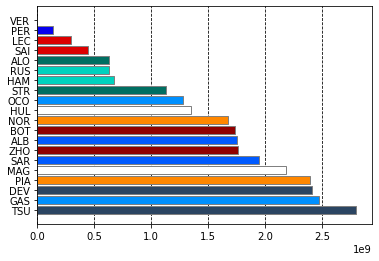

In [ ]:
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)